# Simulating interest rates using Hull White model

$$dr_t = (\theta(t) - ar_t)dt + \sigma dW_t$$
where a, $\sigma$ are constants

In [1]:
import QuantLib as ql 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

plt.style.use('bmh')

In [2]:
# set evaluation date
eval_date = ql.Date(26, ql.March, 2022)
ql.Settings.instance().evaluationDate = eval_date

In [3]:
# define arguments

sigma = 0.1
a = 0.1
length = 30 # years
timestep = 360 # 30 years x 12 months
forward_rate = 0.05
day_count = ql.Thirty360()

In [4]:
# constant rate
spot_curve = ql.FlatForward(eval_date,
                            ql.QuoteHandle(ql.SimpleQuote(forward_rate)),
                            day_count)

spot_curve_handle = ql.YieldTermStructureHandle(spot_curve)

In [5]:
# Hull-White process
hw_process = ql.HullWhiteProcess(spot_curve_handle, a, sigma)

In [6]:
rng = ql.GaussianRandomSequenceGenerator(
            ql.UniformRandomSequenceGenerator(
                    timestep, ql.UniformRandomGenerator()))

seq = ql.GaussianPathGenerator(hw_process, length, timestep, rng, False)

In [7]:
path = seq.next().value()
time_index = [path.time(i) for i in range(len(path))]

In [8]:
num_paths = 1000
sim_paths = np.zeros((len(time_index), num_paths))
for i in range(num_paths):
    path = list(seq.next().value())
    sim_paths[:, i] = path

In [9]:
paths_df = pd.DataFrame(data=sim_paths, index=time_index)
paths_df.index.set_names('Years', inplace=True)
paths_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Years,,,,,,,,,,,,,,,,,,,,,
0.000000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
0.083333,-0.001790,0.071141,0.031481,0.046021,0.050380,0.017675,0.051038,0.060419,0.077101,0.073311,...,0.015282,0.024752,0.074613,0.015325,0.077893,0.036147,-0.015736,-0.001749,0.050967,0.047048
0.166667,0.007121,0.021869,-0.014270,0.012737,0.095407,0.030046,0.032299,0.038701,0.049614,0.124805,...,0.007943,0.018052,0.109927,0.049167,0.071941,0.007012,-0.020744,0.021602,0.057386,-0.002451
0.250000,0.028830,-0.032312,-0.061145,-0.000042,0.106697,0.004344,0.034930,0.063233,0.080177,0.140667,...,0.023603,0.042222,0.151139,0.060429,0.072858,-0.018659,-0.004870,0.009074,0.049050,0.009260
0.333333,-0.010737,-0.034081,-0.066252,0.046293,0.103551,0.008016,0.097968,0.033537,0.081518,0.130498,...,0.057142,0.055889,0.167890,0.030103,0.080676,-0.012367,-0.023269,0.043650,0.051806,0.006470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29.666667,0.568178,0.406600,0.389381,0.423035,1.065402,0.858221,0.530129,0.530214,0.360732,0.691716,...,0.159987,0.523576,0.303802,0.462673,0.404014,0.514803,0.411974,0.873517,0.291402,0.302617
29.750000,0.569867,0.432423,0.422248,0.389847,1.078758,0.837277,0.493179,0.567400,0.310997,0.686224,...,0.154005,0.511988,0.309767,0.492941,0.424860,0.508847,0.413044,0.810428,0.267906,0.284006
29.833333,0.614893,0.435582,0.435845,0.395038,1.112629,0.833384,0.449607,0.617082,0.324690,0.636914,...,0.203842,0.499765,0.350277,0.473568,0.409420,0.482292,0.392047,0.822378,0.325594,0.271449


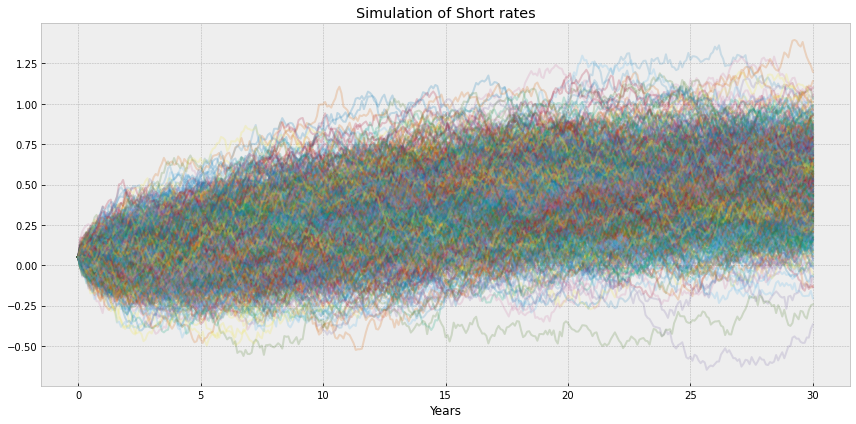

In [10]:
paths_df.plot(figsize=(12,6), alpha=0.2, legend=False, title='Simulation of Short rates')
plt.tight_layout()
plt.show()

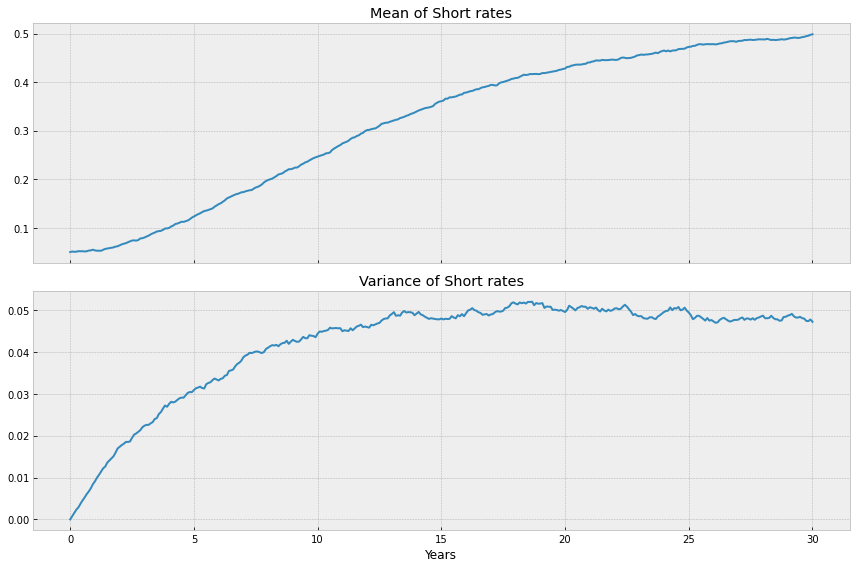

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

paths_df.mean(axis=1).plot(title='Mean of Short rates', ax=ax[0])
paths_df.var(axis=1).plot(title='Variance of Short rates', ax=ax[1])

plt.tight_layout()
plt.show()